# Star Wars Survey

### Introduction

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

This analysis, that followed data cleaning, aimed to answer the following questions:
- which Star Wars movie received the highest rank among respondents?
- which movie was seen by the most respondents?
- how the findings for two questions above look like specifically for Star Trek fans?
- which Star Wars movies recived the highest rank by the education level of the respondent?
- who is the favourite and the least favourite Star Wars character among the respondents?
- who is the favourite and the least favourite Star Wars character by the income level of the respondent?

In [1]:
## importing relevant libralies and reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv(r'C:\Users\witol\Desktop\StarWars.csv', encoding="ISO-8859-1")

In [2]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
# exploring first row, which seems to differ from the rest of the dataset
print(star_wars.iloc[0])

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [4]:
# dropping the first row
star_wars.drop(0)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


### Cleaning and Mapping Yes/No Columns

In [5]:
# creating a dictionary to define a mapping from Yes/No to boolean (True and False)
yes_no = {
    "Yes": True,
    "No": False,
    "Response": np.nan 
}

In [6]:
# converting the columns to boolean type
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [7]:
# confirming that the mapping and converting was executed
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
# confirming that the mapping and converting was executed
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Cleaning and Mapping Checkbox Columns

In [9]:
# creating a mapping dictionaries in order to convert each of the columns related to movies' views to boolean
sw_1 = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}

sw_2 = {
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False
}

sw_3 = {
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False
}

sw_4 = {
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
}

sw_5 = {
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False
}

sw_6 = {
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

In [10]:
# converting the column to boolean type
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(sw_1)

In [11]:
# converting the column to boolean type
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(sw_2)

In [12]:
# converting the column to boolean type
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(sw_3)

In [13]:
# converting the column to boolean type
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(sw_4)

In [14]:
# converting the column to boolean type
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(sw_5)

In [15]:
# converting the column to boolean type
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(sw_6)

In [16]:
# creating dictionary for a purpose of renaming columns related to movies' views
columns_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

In [17]:
# renaming the columns related to movies' views
star_wars = star_wars.rename(columns=columns_names)

### Cleaning the Ranking Columns

In [18]:
# veryfying the unique values in the columns related to respondent's favourite movies (ranking)
star_wars["Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."].value_counts()

4                                           237
6                                           168
3                                           130
1                                           129
5                                           100
2                                            71
Star Wars: Episode I  The Phantom Menace      1
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

In [19]:
# dropping one row that would disable quantitative analysis
star_wars = star_wars.drop(star_wars[star_wars["Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."] == 'Star Wars: Episode I  The Phantom Menace'].index)

In [20]:
# converting all the ranking columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [21]:
# creating dictionary for a purpose of renaming the ranking columns
other_columns_names = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

In [22]:
# renaming the ranking columns 
star_wars = star_wars.rename(columns=other_columns_names)

### Finding the Highest-Ranked Movie

In [23]:
# computing mean of each ranking column
means = star_wars[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6']].mean()

In [24]:
# displaying mean of each ranking column
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

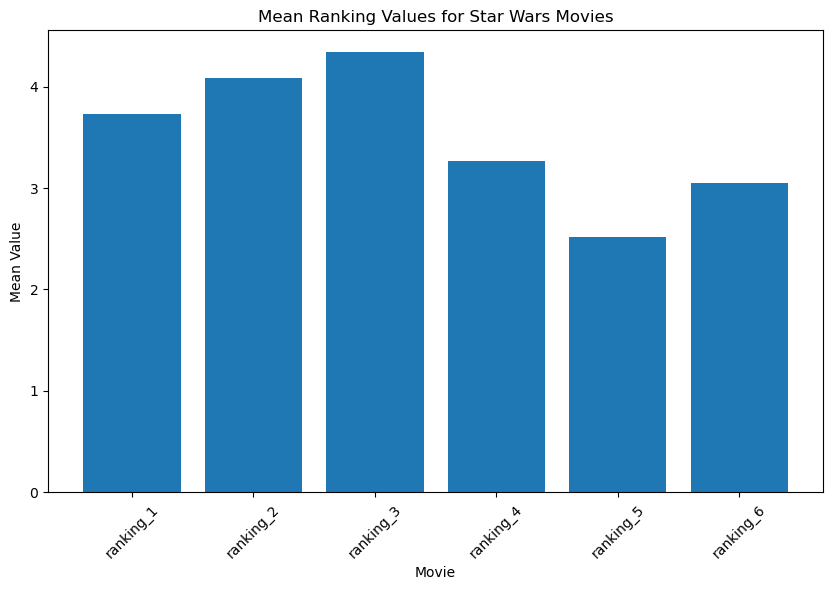

In [25]:
# creating bar chart showing mean ranking values for all the movies
plt.figure(figsize=(10, 6))
plt.bar(means.index, means.values)
plt.xlabel('Movie')
plt.ylabel('Mean Value')
plt.title('Mean Ranking Values for Star Wars Movies')
plt.xticks(rotation=45) 
plt.show()

Having in mind that that a lower ranking means the better average ranking received, it seems that the most favourite movie oif respondents is Star Wars: Episode V The Empire Strikes Back (mean 2.513158), followed by Star Wars: Episode VI Return of the Jedi (3.047847) and Star Wars: Episode IV  A New Hope (3.272727). 

Clearly, the classic trilogy is the best!

### Finding the Most Viewed Movie

In [26]:
# computing sum of each views column
sums = star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6']].sum()

In [27]:
# displaying sum of each views column
sums

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

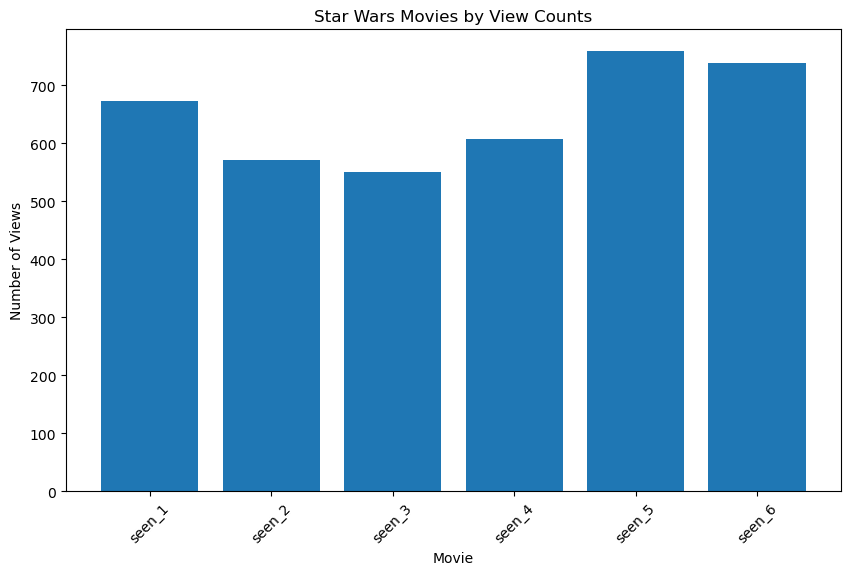

In [28]:
# creating bar chart showing sum of views for all the movies
plt.figure(figsize=(10, 6))
plt.bar(sums.index, sums.values)
plt.xlabel('Movie')
plt.ylabel('Number of Views')
plt.title('Star Wars Movies by View Counts')
plt.xticks(rotation=45) 
plt.show()

Looking at both graps (rankings and views) it seems that they are correlated, i.e. the old trilogy seems to have more views and better rankings than the new trilogy.

### Disagregating Findings above by Star Trek Fans

In [29]:
# splitting the data based on the binary segment
star_trek_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]

In [30]:
# computing mean of each ranking column for Star Trek fans only
means_trek = star_trek_fans[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6']].mean()

In [31]:
# displaying mean of each ranking column for Star Trek fans only
means_trek

ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64

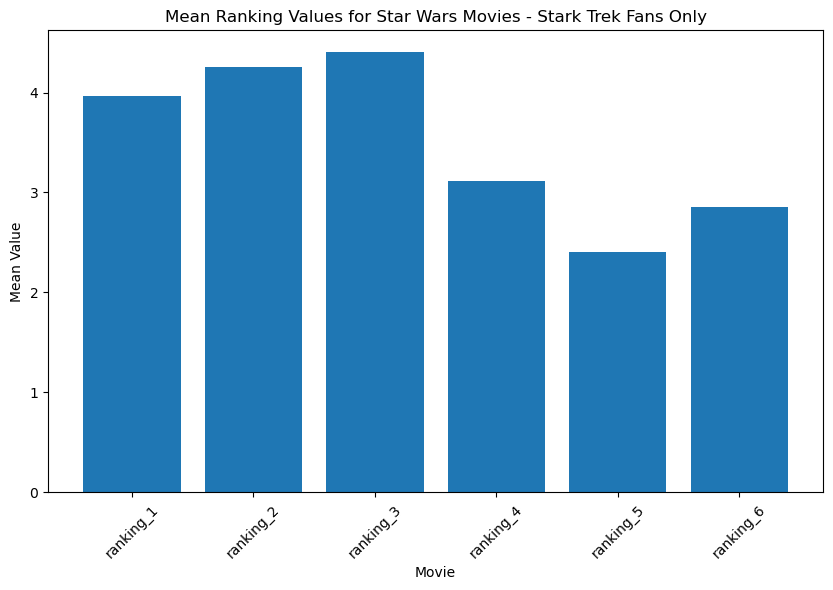

In [32]:
# creating bar chart showing mean ranking values for all the movies for Star Trek fans only
plt.figure(figsize=(10, 6))
plt.bar(means_trek.index, means_trek.values)
plt.xlabel('Movie')
plt.ylabel('Mean Value')
plt.title('Mean Ranking Values for Star Wars Movies - Stark Trek Fans Only')
plt.xticks(rotation=45) 
plt.show()

In [33]:
# computing sum of each views column for Star Trek fans only
sums_trek = star_trek_fans[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6']].sum()

In [34]:
# displaying sum of each views column for Star Trek fans only
sums_trek

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64

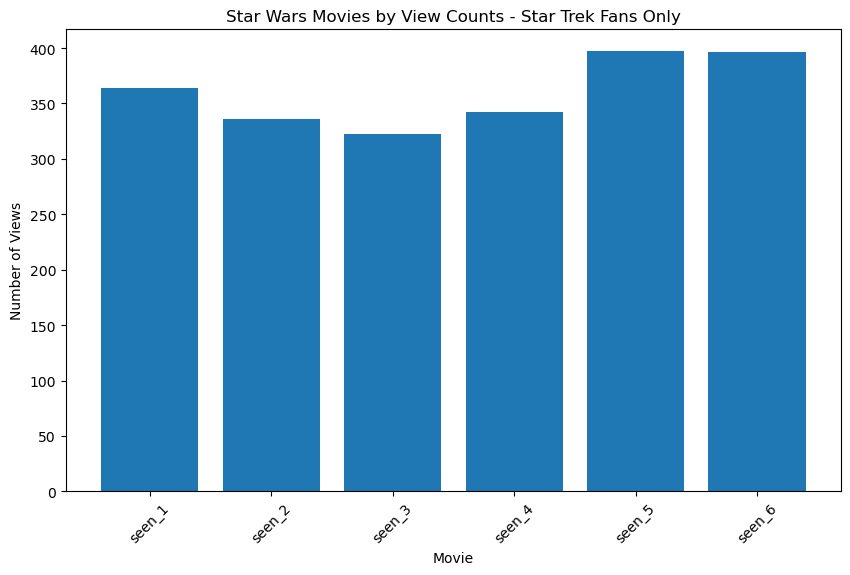

In [35]:
# creating bar chart showing sum of views for all the movies for Star Trek fans only
plt.figure(figsize=(10, 6))
plt.bar(sums_trek.index, sums_trek.values)
plt.xlabel('Movie')
plt.ylabel('Number of Views')
plt.title('Star Wars Movies by View Counts - Star Trek Fans Only')
plt.xticks(rotation=45) 
plt.show()

No big surpises here. Star Trek fans favour the old trilogy as well, with Star Wars: Episode V The Empire Strikes Back being their favourite movie.

### Disaggregating Findings by Education Level

In [36]:
# disaggregating ranking scores for all movies by the education level
education_ranking_means_1 = star_wars.groupby('Education')['ranking_1'].mean()
education_ranking_means_2 = star_wars.groupby('Education')['ranking_2'].mean()
education_ranking_means_3 = star_wars.groupby('Education')['ranking_3'].mean()
education_ranking_means_4 = star_wars.groupby('Education')['ranking_4'].mean()
education_ranking_means_5 = star_wars.groupby('Education')['ranking_5'].mean()
education_ranking_means_6 = star_wars.groupby('Education')['ranking_6'].mean()

In [37]:
# creating a list of ranking labels
ranking_labels = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

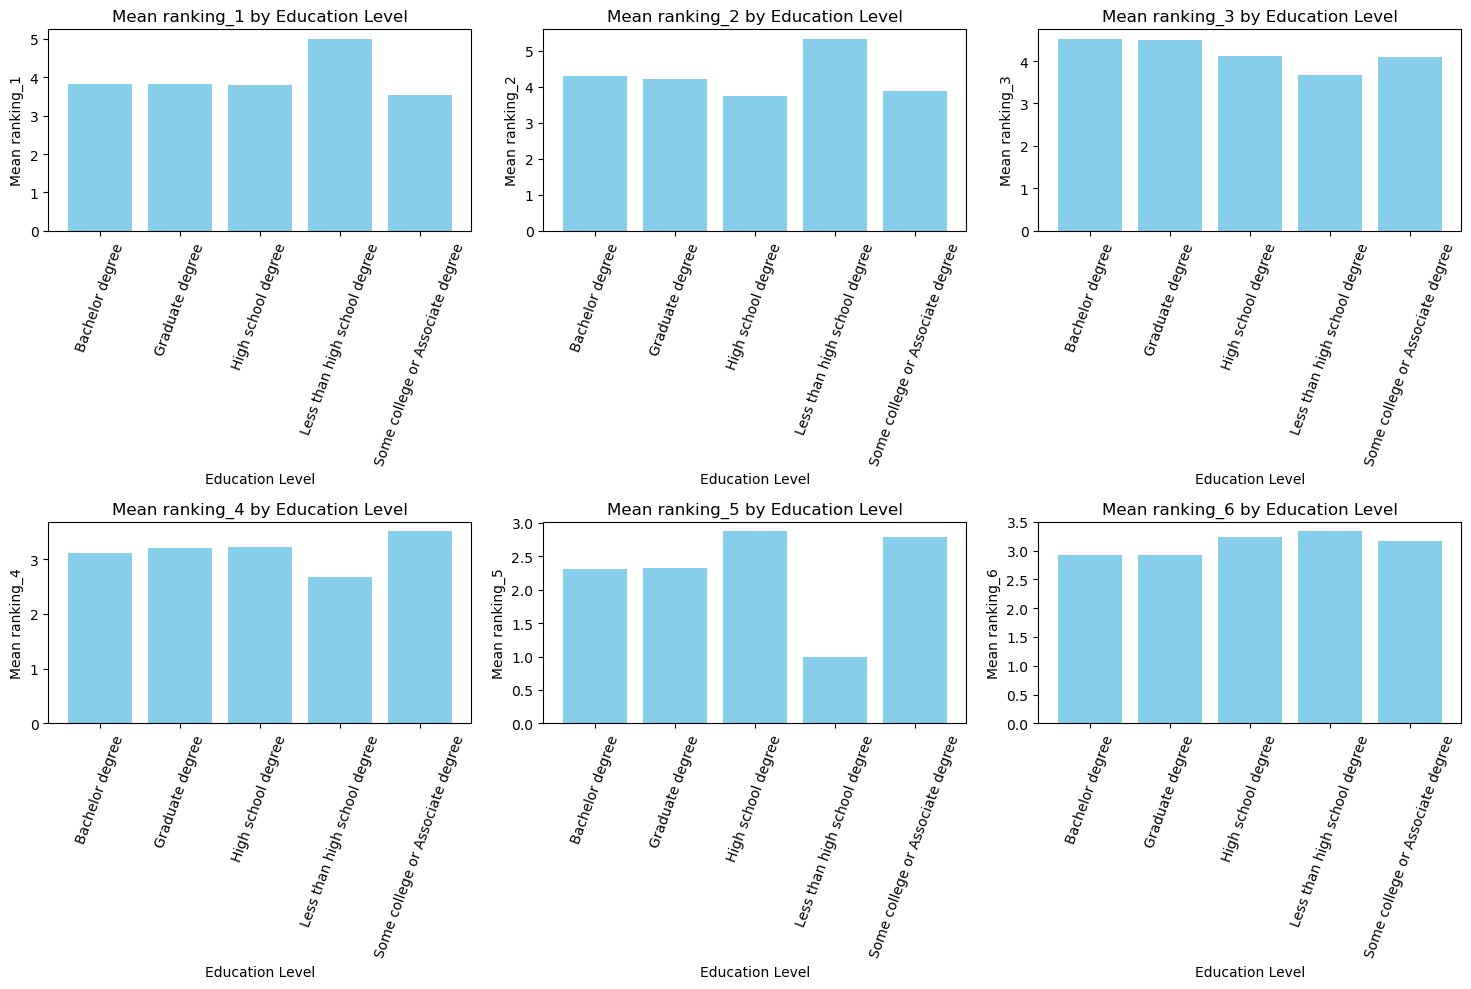

In [38]:
# creating a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# flattening the axes array for easy indexing
axes = axes.flatten()

# iterating through each ranking and create a bar chart
for i, ranking in enumerate(ranking_labels):
    ax = axes[i]
    ax.bar(education_ranking_means_1.index, star_wars.groupby('Education')[ranking].mean(), color='skyblue')
    ax.set_title(f'Mean {ranking} by Education Level')
    ax.set_xlabel('Education Level')
    ax.set_ylabel(f'Mean {ranking}')
    ax.tick_params(axis='x', rotation=70)

# adjusting layout
plt.tight_layout()

# showing the grid of bar charts
plt.show()

Interestingly, it seems that respondents with the lowest education level (Less than high school degree) were the ones who gave the highest rankings to Star Wars: Episode IV  A New Hope and Star Wars: Episode V The Empire Strikes Back. They also gave the lowest rankings to Star Wars: Episode I  The Phantom Menace and Star Wars: Episode II  Attack of the Clones.

### Respondents' Most Favourite Characters

In [39]:
# exploring answer options for favourite character columns
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [40]:
# creating dictionary for a purpose of renaming the favourite character columns
char_columns_names = {
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "han_solo",
    "Unnamed: 16": "luke",
    "Unnamed: 17": "leia",
    "Unnamed: 18": "anakin",
    "Unnamed: 19": "obi_wan",
    "Unnamed: 20": "palpatine",
    "Unnamed: 21": "darth_vader",
    "Unnamed: 22": "lando",
    "Unnamed: 23": "boba_fett",
    "Unnamed: 24": "c_3po",
    "Unnamed: 25": "r2_d2",
    "Unnamed: 26": "jar_jar",
    "Unnamed: 27": "amidala",
    "Unnamed: 28": "yoda"
}

In [41]:
# renaming the favourite character columns
star_wars = star_wars.rename(columns=char_columns_names)

In [42]:
# creating a dictionary for the favourability mapping
favorability_mapping = {
    'Very favorably': 2,
    'Somewhat favorably': 1,
    'Neither favorably nor unfavorably (neutral)': 0,
    'Unfamiliar (N/A)': 0,
    'Somewhat unfavorably': -1,
    'Very unfavorably': -2
}

In [43]:
# creating a list of character columns
character_columns = ['han_solo', 'luke', 'leia', 'anakin', 'obi_wan', 'palpatine', 'darth_vader', 'lando', 'boba_fett', 'c_3po', 'r2_d2', 'jar_jar', 'amidala', 'yoda']

In [44]:
# calculating the overall favorability score for each character
for column in character_columns:
    # mapping responses to scores, treating NaN values in character columns as 0
    star_wars[column + '_Score'] = star_wars[column].apply(lambda x: favorability_mapping.get(x, 0))

In [45]:
# finding the respondent's favorite character by comparing the sum of scores for each character
favorite_character = character_columns[0]
for column in character_columns:
    if star_wars[column + '_Score'].sum() > star_wars[favorite_character + '_Score'].sum():
        favorite_character = column

print("Favorite Character:", favorite_character)

Favorite Character: han_solo


In [46]:
# find the respondent's least favorite character by comparing the sum of scores for each character
least_favorite_character = character_columns[0]
for column in character_columns:
    if star_wars[column + '_Score'].sum() < star_wars[least_favorite_character + '_Score'].sum():
        least_favorite_character = column

print("Least Favorite Character:", least_favorite_character)

Least Favorite Character: jar_jar


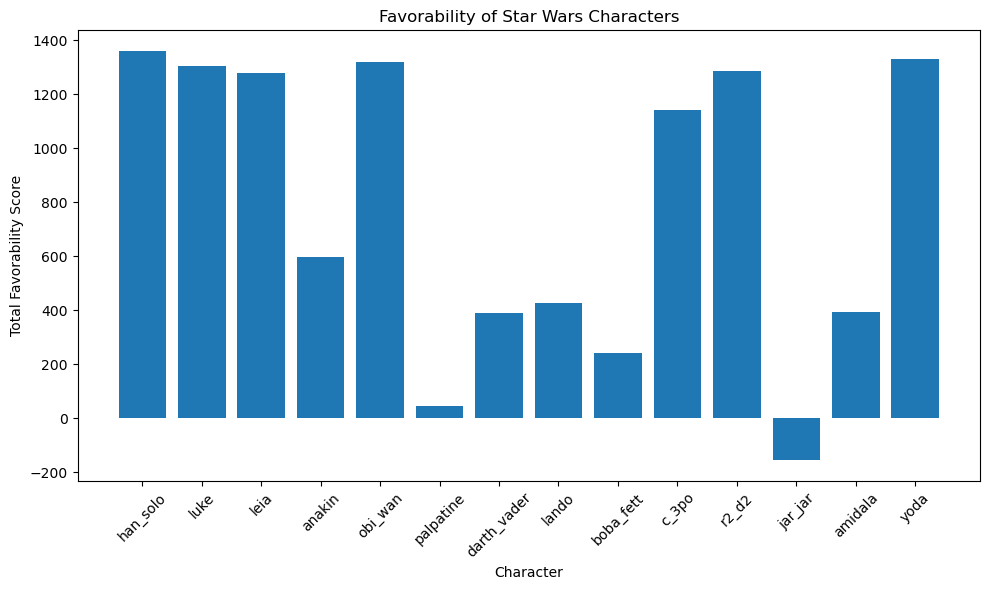

In [47]:
# creating a list of character names and their corresponding total scores
characters = ['han_solo', 'luke', 'leia', 'anakin', 'obi_wan', 'palpatine', 'darth_vader', 'lando', 'boba_fett', 'c_3po', 'r2_d2', 'jar_jar', 'amidala', 'yoda']
scores = [star_wars[f'{character}_Score'].sum() for character in characters]

# create the bar chart to visualize favorability scores for all the characters
plt.figure(figsize=(10, 6))
plt.bar(characters, scores)
plt.xlabel('Character')
plt.ylabel('Total Favorability Score')
plt.title('Favorability of Star Wars Characters')
plt.xticks(rotation=45) 

# showing the plot
plt.tight_layout()
plt.show()

Han Solo is the respondent's most favourite character, followed by Yoda and Obi-Wan. The least favourite character is Jar Jar, followed by Palpatine and Boba Fett.

### Favourite Character by the Income Category

In [48]:
# exploring income categories of respondents
star_wars['Household Income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [49]:
# grouping by household income and calculating mean character scores for each income group
income_groups = star_wars.groupby('Household Income')[[f'{column}_Score' for column in character_columns]].mean()

In [50]:
# displaying the table showing favourite character by the household income
income_groups

,han_solo_Score,luke_Score,leia_Score,anakin_Score,obi_wan_Score,palpatine_Score,darth_vader_Score,lando_Score,boba_fett_Score,c_3po_Score,r2_d2_Score,jar_jar_Score,amidala_Score,yoda_Score
Household Income,,,,,,,,,,,,,,
"$0 - $24,999",1.086957,0.978261,0.898551,0.311594,0.978261,-0.043478,0.355072,0.260870,0.152174,0.862319,1.043478,-0.217391,0.224638,1.123188
"$100,000 - $149,999",1.340426,1.304965,1.297872,0.723404,1.333333,0.078014,0.482270,0.489362,0.248227,1.085106,1.234043,-0.099291,0.404255,1.283688
"$150,000+",1.410526,1.347368,1.305263,0.578947,1.400000,0.073684,0.357895,0.357895,0.221053,1.105263,1.284211,-0.336842,0.368421,1.400000
"$25,000 - $49,999",1.177419,1.139785,1.139785,0.478495,1.177419,0.172043,0.419355,0.381720,0.236559,1.026882,1.107527,-0.016129,0.274194,1.145161
"$50,000 - $99,999",1.332215,1.305369,1.295302,0.597315,1.295302,0.026846,0.352349,0.463087,0.248322,1.130872,1.281879,-0.211409,0.436242,1.298658


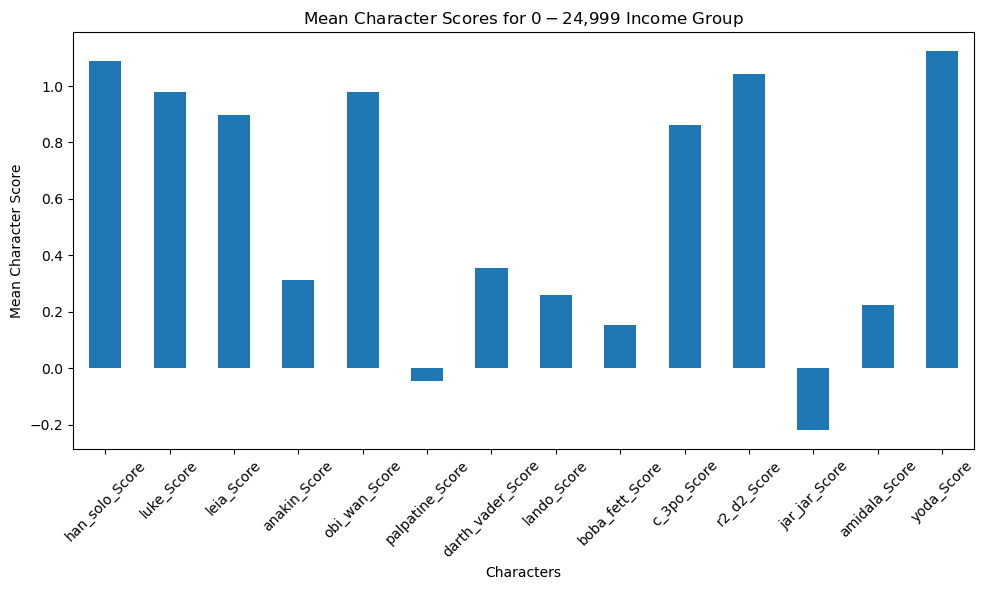

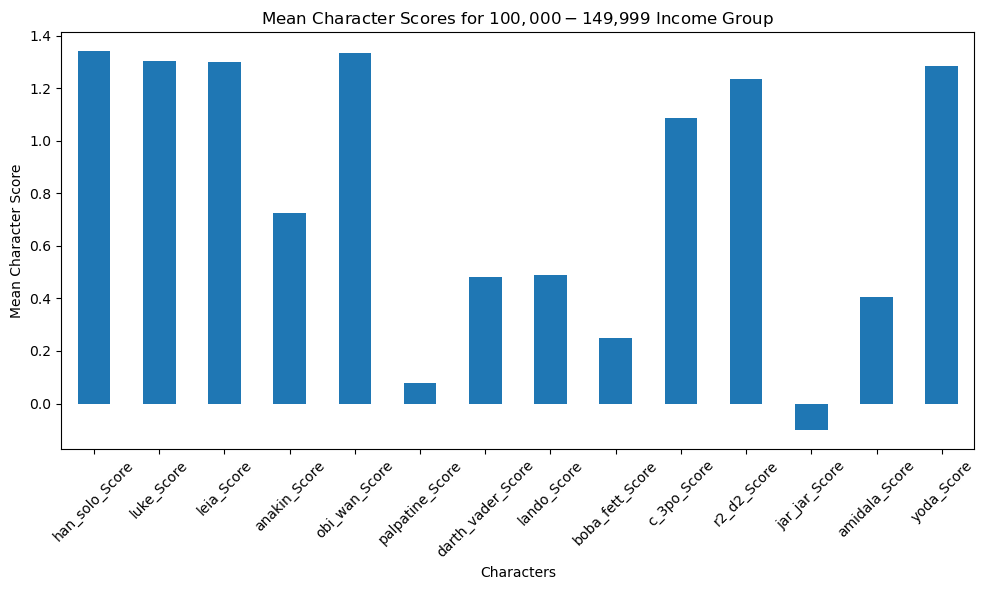

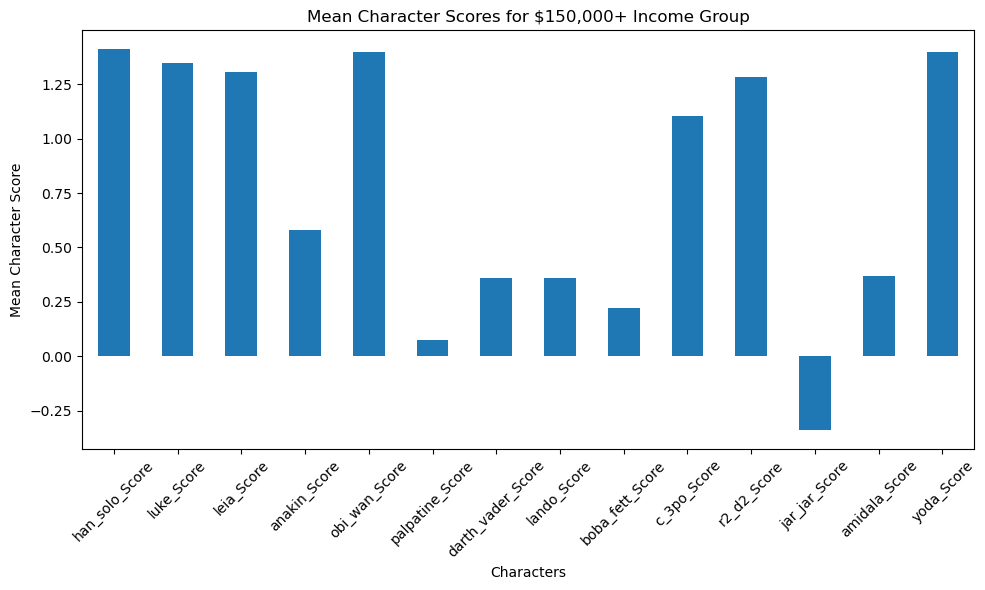

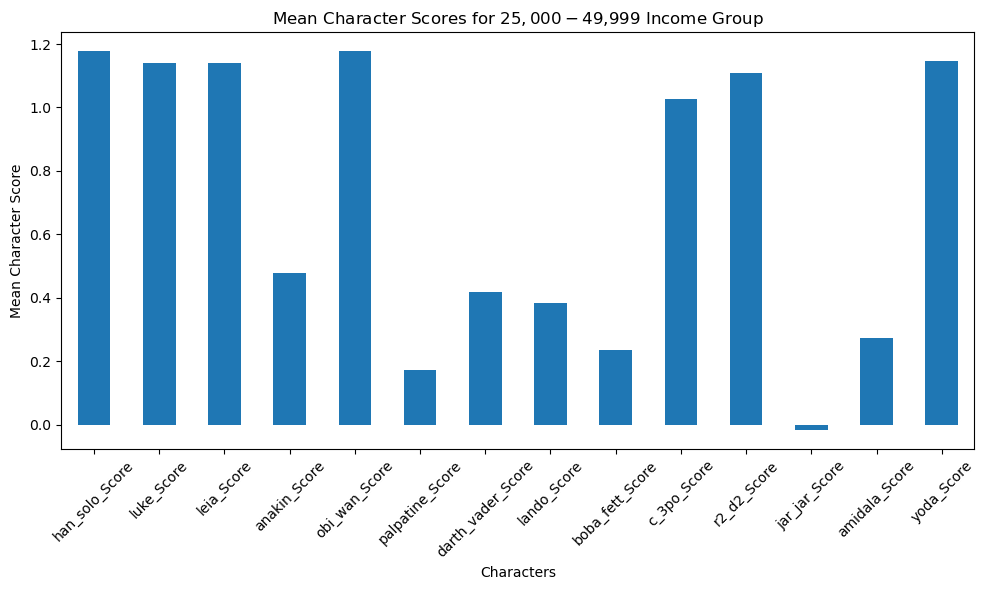

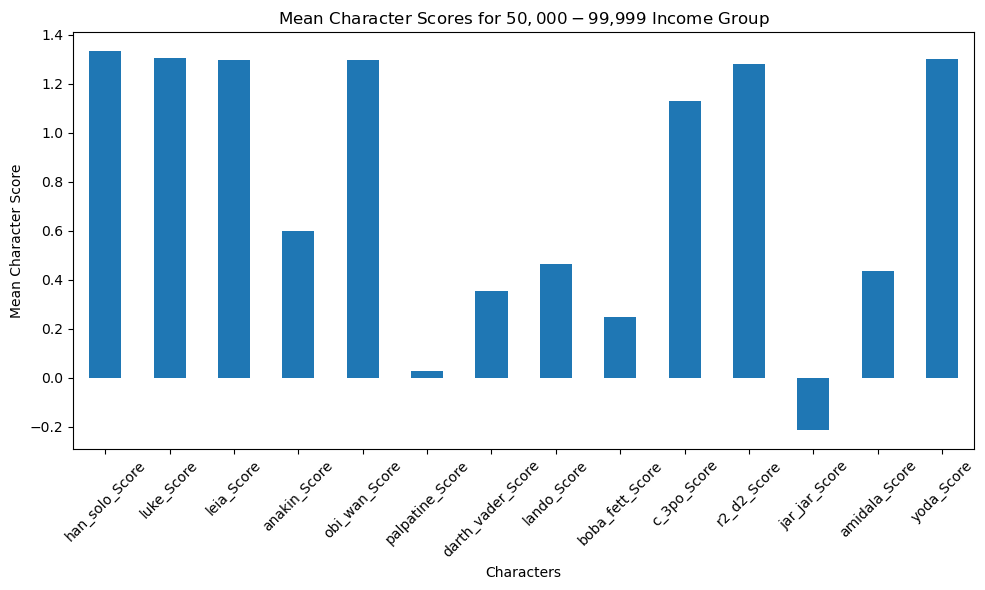

In [51]:
# transposing the table for better visualization (characters as rows, income groups as columns)
income_groups = income_groups.transpose()

# iterating through the income groups and creating separate charts
for income_group in income_groups.columns:
    # creating the chart for the current income group
    plt.figure(figsize=(10, 6))
    income_groups[income_group].plot(kind='bar')
    plt.xlabel('Characters')
    plt.ylabel('Mean Character Score')
    plt.title(f'Mean Character Scores for {income_group} Income Group')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # showing the chart for the current income group
    plt.show()

In [52]:
# finding the most favorite and least favorite characters for each income group
most_favorite_characters = {}
least_favorite_characters = {}

for income_group in income_groups.columns:
    most_favorite_character = income_groups[income_group].idxmax()
    least_favorite_character = income_groups[income_group].idxmin()
    
    most_favorite_characters[income_group] = most_favorite_character
    least_favorite_characters[income_group] = least_favorite_character

# printing the most and least favorite characters by income group
for income_group, most_favorite_character in most_favorite_characters.items():
    print(f"Most Favorite Character in {income_group}: {most_favorite_character}")
    
for income_group, least_favorite_character in least_favorite_characters.items():
    print(f"Least Favorite Character in {income_group}: {least_favorite_character}")

Most Favorite Character in $0 - $24,999: yoda_Score
Most Favorite Character in $100,000 - $149,999: han_solo_Score
Most Favorite Character in $150,000+: han_solo_Score
Most Favorite Character in $25,000 - $49,999: han_solo_Score
Most Favorite Character in $50,000 - $99,999: han_solo_Score
Least Favorite Character in $0 - $24,999: jar_jar_Score
Least Favorite Character in $100,000 - $149,999: jar_jar_Score
Least Favorite Character in $150,000+: jar_jar_Score
Least Favorite Character in $25,000 - $49,999: jar_jar_Score
Least Favorite Character in $50,000 - $99,999: jar_jar_Score


In general, findings for each income group do align with findings for overall respondents. However, there is small discrepancy - the most favourite character for income level $0 - $24,999 is Yoda.